In [2]:
import torchvision.transforms as transforms
import augly.image as imaugs
from PIL import Image
from tqdm import tqdm
import os

In [17]:
path = "../../../pepe/cartoon_like_frog_new/test/"
save_path = "../../../pepe/cartoon_like_frog_new/test_aug/"
files = os.listdir(path)
for file in tqdm(files):
    if not file.endswith('.jpg'):
        continue
    image = Image.open(path+file).convert('RGB')
    
    rotate = imaugs.rotate(
        image,
        degrees=30,
        bboxes=[(20, 6, 250, 180)],
        bbox_format="pascal_voc",
    )
    rotate.save(save_path+"rotate/"+file)
#     rotate.save(save_path+file)
    
    shuffle_pixel = imaugs.shuffle_pixels(image, factor=0.3)
    shuffle_pixel.save(save_path+"shuffle_pixel/"+file)
#     shuffle_pixel.save(save_path+file)
    
    aug_random_aspect = imaugs.RandomAspectRatio()
    random_aspect = aug_random_aspect(image)
    random_aspect.save(save_path+"stretch/"+file)
#     random_aspect.save(save_path+file)
    
    aug_blur = imaugs.Blur()
    blur = aug_blur(image)
    blur.save(save_path+"blurred/"+file)
#     blur.save(save_path+file)
    
    COLOR_JITTER_PARAMS = {
        "brightness_factor": 1.2,
        "contrast_factor": 1.2,
        "saturation_factor": 1.4,
    }
    aug_color_jitter = imaugs.ColorJitter(**COLOR_JITTER_PARAMS)
    color_jitter = aug_color_jitter(image)
    color_jitter.save(save_path+"color_jitter/"+file)
#     color_jitter.save(save_path+file)
    
    AUGMENTATIONS = [
        imaugs.Blur(),
        imaugs.ColorJitter(**COLOR_JITTER_PARAMS)
    ]
    TRANSFORMS = imaugs.Compose(AUGMENTATIONS)
    blur_color_jitter = TRANSFORMS(image)
    blur_color_jitter.save(save_path+"blur_color_jitter/"+file)
#     blur_color_jitter.save(save_path+file)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 41.35it/s]


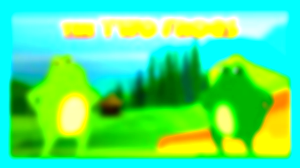

In [4]:
blur_color_jitter